In [90]:
# @title Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle

In [91]:
# @title Reading CSV file
df=pd.read_csv('milknew.csv')
df.head()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


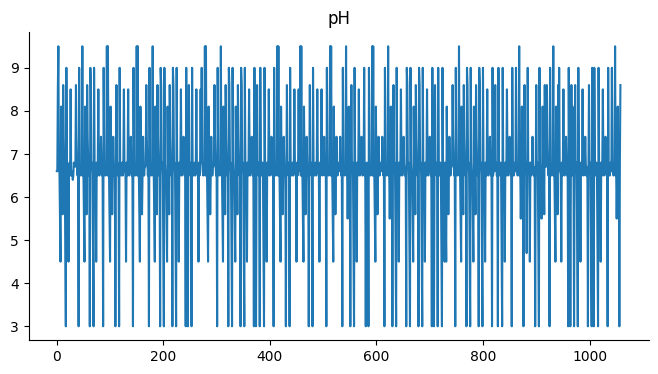

In [92]:
# @title Analysing pH

from matplotlib import pyplot as plt
df['pH'].plot(kind='line', figsize=(8, 4), title='pH')
plt.gca().spines[['top', 'right']].set_visible(False)

In [93]:
print(f'Total rows:{df.shape[0]}')
print(f'Total columns:{df.shape[1]}')

Total rows:1059
Total columns:8


In [94]:
# segregates into object type that is string type and numerical type 
cat_col=df.select_dtypes(include=['object']).columns.tolist()
num_col=df.select_dtypes(exclude=['object']).columns.tolist()
print(f"Categorical columns are:{cat_col}")
print(f"Numerical columns are:{num_col}")


Categorical columns are:['Grade']
Numerical columns are:['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']


In [95]:
# @title Check for Duplicate data
# identifying the duplicate for diagonsing 

print("Checking for duplicate data:\n")
if df.duplicated().any():
  print("Duplicate rows in dataset")
else:
  print("No duplicate rows ")

Checking for duplicate data:

Duplicate rows in dataset


In [96]:
print("Display duplicate rows:")
df[df.duplicated()]

Display duplicate rows:


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [97]:
print("Droping Duplicates:")
df1=df.drop_duplicates()
print("Dataset after dropping")
df1.shape


Droping Duplicates:
Dataset after dropping


(83, 8)

In [98]:
print("Checking for missing values")
df1.isnull().sum()

Checking for missing values


pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [99]:
print("Checking for missing values")
df1.isnull().sum()

Checking for missing values


pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [100]:
df1.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,6.668675,43.698795,0.493976,0.397590,0.602410,0.433735,251.313253
std,0.986856,9.379187,0.503003,0.492375,0.492375,0.498602,4.577058
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,247.000000
50%,6.600000,41.000000,0.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [101]:
df1.groupby('Grade').mean().T

Grade,high,low,medium
pH,6.665217,6.726923,6.626471
Temprature,39.913043,51.500000,40.294118
Taste,0.695652,0.500000,0.352941
Odor,0.695652,0.461538,0.147059
Fat,0.956522,0.653846,0.323529
Turbidity,0.608696,0.615385,0.176471
Colour,252.739130,251.615385,250.117647


In [102]:
print("Unqiue values in column:")
for col in df1.columns:
  print(df1[col].value_counts())
  print("---------------")
  print("")

Unqiue values in column:
pH
6.6    25
6.8    19
6.5    16
6.7     5
8.5     2
4.5     2
8.6     2
7.4     2
3.0     2
9.0     2
9.5     1
5.5     1
8.1     1
5.6     1
4.7     1
6.4     1
Name: count, dtype: int64
---------------

Temprature
45    16
40    11
38    11
50     6
43     6
37     6
36     5
55     4
41     4
35     4
34     3
70     2
90     1
66     1
60     1
42     1
65     1
Name: count, dtype: int64
---------------

Taste
0    42
1    41
Name: count, dtype: int64
---------------

Odor
0    50
1    33
Name: count, dtype: int64
---------------

Fat 
1    50
0    33
Name: count, dtype: int64
---------------

Turbidity
0    47
1    36
Name: count, dtype: int64
---------------

Colour
255    43
250    13
245     8
246     7
240     4
253     3
247     3
254     1
248     1
Name: count, dtype: int64
---------------

Grade
medium    34
low       26
high      23
Name: count, dtype: int64
---------------



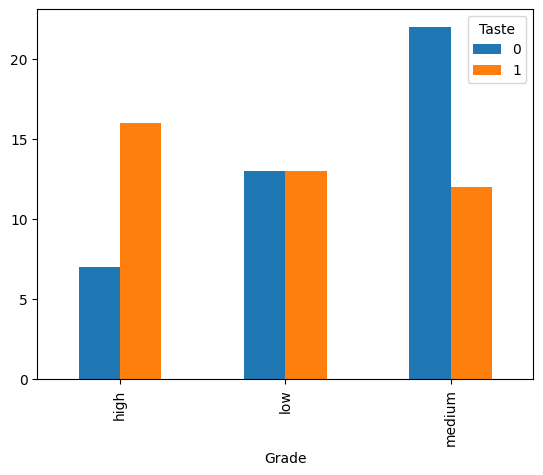

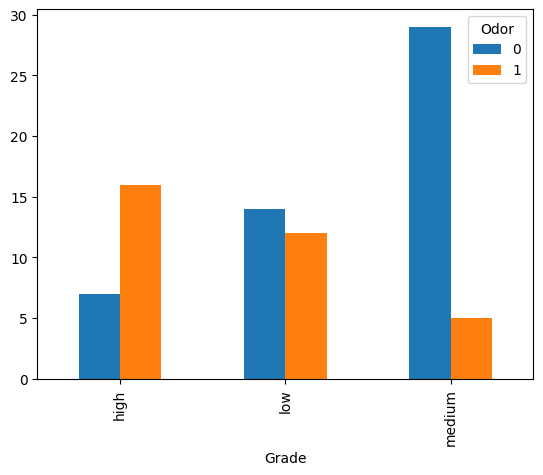

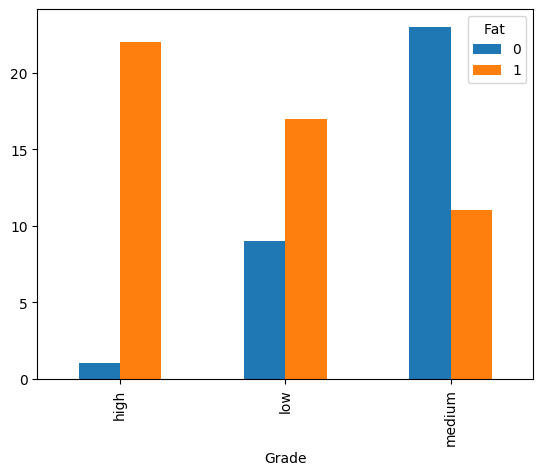

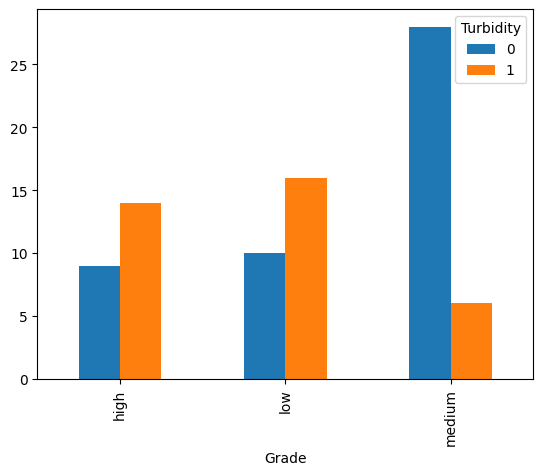

In [103]:
cols=['Taste','Odor','Fat ','Turbidity']
for col in cols:
  pd.crosstab(df1.Grade,df1[col]).plot(kind ='bar')



In [104]:
df1['Grade'].value_counts()

Grade
medium    34
low       26
high      23
Name: count, dtype: int64

In [105]:
def grade_label(x):
      if x =='high':
        return 2
      elif x=='low':
        return 0
      else:
        return 1

df1['Grade']=df1['Grade'].apply(lambda x : grade_label(x))
print("Target after encoding:")
df1.head()

Target after encoding:


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [106]:
print("X features and y labels")
X=df1.drop('Grade',axis=1)
y=df1.Grade
print(X.head())
print("")
print("y label")
print(y.head())

X features and y labels
    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0  6.6          35      1     0     1          0     254
1  6.6          36      0     1     0          1     253
2  8.5          70      1     1     1          1     246
3  9.5          34      1     1     0          1     255
4  6.6          37      0     0     0          0     255

y label
0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int64


In [107]:
# @title Splitting test train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print("Training size=",X_train.shape)
print("Testing size=",X_test.shape)

Training size= (66, 7)
Testing size= (17, 7)


In [108]:
# @title Model Development
#Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier


In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [110]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
ETC=ExtraTreesClassifier()
SVM=SVC()
KNN=KNeighborsClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
NB=MultinomialNB()

In [111]:
import warnings
warnings.filterwarnings('ignore')

models = [LR, DT, RF, ETC, SVM, KNN, GBC, ABC, NB]
features = X  # Assuming X contains your features
labels = y    # Assuming y contains your labels
CV = 5        # Cross-validation
accu_list = []  # Accuracy List
ModelName = []  # Model Name List

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring = 'accuracy', cv=CV)
    accu_list.append(accuracies.mean() * 100)
    ModelName.append(model_name)

model_acc_df = pd.DataFrame({"Model": ModelName, "Cross_Val_Accuracy": accu_list})
model_acc_df = model_acc_df.sort_values('Cross_Val_Accuracy', ascending=False)
model_acc_df

,Model,Cross_Val_Accuracy
6,GradientBoostingClassifier,85.588235
2,RandomForestClassifier,81.985294
7,AdaBoostClassifier,80.808824
1,DecisionTreeClassifier,76.985294
3,ExtraTreesClassifier,75.735294
8,MultinomialNB,71.250000
5,KNeighborsClassifier,68.676471
0,LogisticRegression,63.970588
4,SVC,40.955882


In [112]:
print("Evaluation metrics for GBC")
GBC.fit(X_train,y_train)
y_pred=GBC.predict(X_test)
print("")
print(classification_report(y_test,y_pred))

Evaluation metrics for GBC

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.78      1.00      0.88         7
           2       1.00      0.60      0.75         5

    accuracy                           0.88        17
   macro avg       0.93      0.87      0.88        17
weighted avg       0.91      0.88      0.88        17



<Axes: >

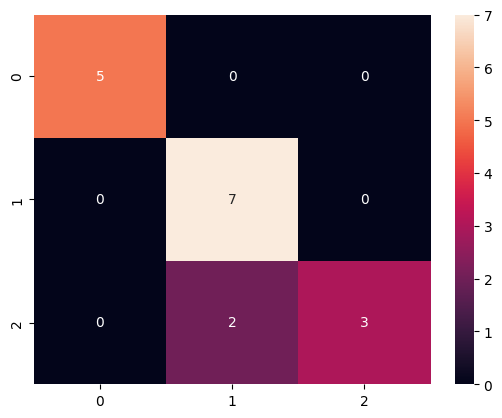

In [113]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [114]:
ph=float(input("Enter Ph:"))
temp=float(input("Enter Temperature:"))
taste=float(input("Enter Taste:"))
odor=float(input("Enter Odor:"))
fat=float(input("Enter Fat:"))
turb=float(input("Enter Turbidity:"))
color=float(input("Enter Color:"))


In [115]:
# input_data=[ph,temp,taste,odor,fat,turb,color]
# prediction=GBC.predict([input_data])
# if(prediction[0]==2):
#   print("HIGH GRADE MILK")
# elif(prediction[0]==1):
#   print("AVERAGE GRADE MILK")
# else:
#   print("LOW GRADE MILK")

In [118]:
input_data = [ph, temp, taste, odor, fat, turb, color]
prediction = GBC.predict([input_data])

if prediction[0] == 2:
    quality_label = "HIGH GRADE MILK"
elif prediction[0] == 1:
    quality_label = "AVERAGE GRADE MILK"
else:
    quality_label = "LOW GRADE MILK"

In [120]:
with open('MilkQuality.pkl','wb') as files:
    pickle.dump(GBC,files)